In [78]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import chardet
import plotly_express as px

""" MOBILITY AND TRANSPORT"""
dataset_path_mat = '/Users/stijnbrons/Documents/GitHub/Project-TIL6022/Data/Mobiliteitstrend__per_rit_en_motief_02102024_122208.csv'
with open(dataset_path_mat, 'rb') as rawdata:

    result = chardet.detect(rawdata.read(100000))
    
result



{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}

In [79]:
df_mat = pd.read_csv(dataset_path_mat,delimiter=';',encoding='UTF-8-SIG')
df_mat

,Geslacht,Leeftijd,Vervoerwijzen,Reismotieven,Marges,Perioden,Ritten per persoon per dag (gemiddeld) (aantal),Afgelegde afstand per rit (gemiddeld) (km),Reisduur per rit (Minuten)
0,Totaal mannen en vrouwen,Totaal,Totaal,Totaal,Waarde,1999*,3.41,10.96,23.72
1,Totaal mannen en vrouwen,Totaal,Totaal,Totaal,Waarde,2003*,3.30,11.04,23.65
2,Totaal mannen en vrouwen,Totaal,Totaal,Totaal,Waarde,2007*,3.20,11.07,23.88
3,Totaal mannen en vrouwen,Totaal,Totaal,Totaal,Waarde,2011*,3.09,11.21,23.76
4,Totaal mannen en vrouwen,Totaal,Totaal,Totaal,Waarde,2015*,3.03,11.36,24.14
...,...,...,...,...,...,...,...,...,...
1435,Totaal mannen en vrouwen,60 tot 65 jaar,Overige vervoerwijze,Overige reismotieven,Waarde,2019*,.,.,.
1436,Totaal mannen en vrouwen,60 tot 65 jaar,Overige vervoerwijze,Overige reismotieven,Waarde,2020*,.,.,.
1437,Totaal mannen en vrouwen,60 tot 65 jaar,Overige vervoerwijze,Overige reismotieven,Waarde,2021*,.,.,.
1438,Totaal mannen en vrouwen,60 tot 65 jaar,Overige vervoerwijze,Overige reismotieven,Waarde,2022*,.,.,.


In [118]:
df_mat = df_mat[df_mat['Leeftijd']=='Totaal']
df_mat = df_mat[df_mat['Vervoerwijzen']=='Totaal']
df_mat = df_mat[df_mat['Reismotieven']!='Totaal']
df_mat = df_mat.sort_values(['Ritten per persoon per dag (gemiddeld) (aantal)'], ascending=True)
df_mat = df_mat.sort_values(['Perioden'], ascending=True)


In [119]:
px.bar(df_mat,
        x="Perioden",
        y="Ritten per persoon per dag (gemiddeld) (aantal)",
        color="Reismotieven")


In [114]:
px.line(df_mat,
        x="Perioden",
        y="Ritten per persoon per dag (gemiddeld) (aantal)",
        line_group= 'Reismotieven',
        color="Reismotieven")


In [76]:
df_mat = df_mat[df_mat['Leeftijd']=='Totaal']
df_mat = df_mat[df_mat['Vervoerwijzen']=='Totaal']
df_mat = df_mat[df_mat['Reismotieven']!='Totaal']


fig = plt.figure(figsize=(12, 9))
gs = fig.add_gridspec(nrows=2)
colors = ['blue','orange','green','red','purple','brown','black']


x = df_mat['Perioden'].drop_duplicates()
y = df_mat['Reismotieven'].drop_duplicates()
labels = ['from and to work','shopping','education and childcare','other motivations']
ax = fig.add_subplot(gs[0])
j=0
for i in y:
    ax.plot(x,df_mat[df_mat['Reismotieven']==i]['Ritten per persoon per dag (gemiddeld) (aantal)'],color = colors[j],marker = '.')
    j+=1
ax.set_xlabel('Year')
ax.set_ylabel('Trips per person per day (on Average)')
ax.set_xticks(ax.get_xticks()[::1])
ax.set_yticks(ax.get_yticks()[::3])
ax.set_title('Trend of Trips per Day of Different Travel Motivations')
ax.legend(labels,loc='upper right',bbox_to_anchor=(1.27, 1))



plt.show()

TypeError: sort_values() missing 1 required positional argument: 'by'

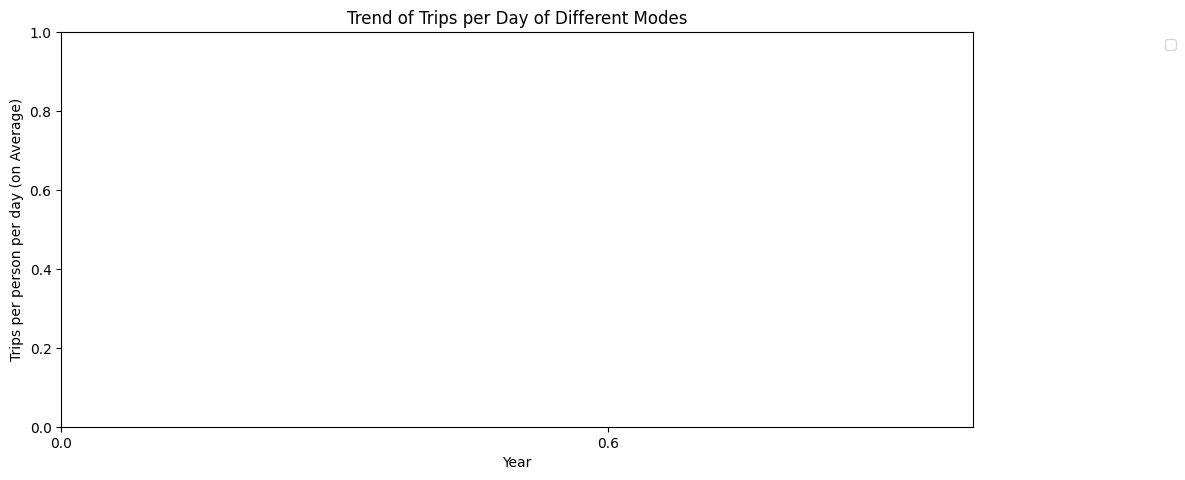

In [54]:
df_mat = df_mat[df_mat['Leeftijd']=='Totaal']
df_mat = df_mat[df_mat['Reismotieven']=='Totaal']
df_mat = df_mat[df_mat['Vervoerwijzen']!='Totaal']

fig = plt.figure(figsize=(12, 9))
gs = fig.add_gridspec(nrows=2)
colors = ['blue','orange','green','red','purple','brown','black']


x = df_mat['Perioden'].drop_duplicates()
y = df_mat['Vervoerwijzen'].drop_duplicates()
labels = ['Car(driver)','Car(passenger)','Train','Bus/Tram/Metro','Bike','Walk','Other Modes']
ax = fig.add_subplot(gs[0])
j=0
for i in y:
    ax.plot(x,df_mat[df_mat['Vervoerwijzen']==i]['Ritten per persoon per dag (gemiddeld) (aantal)'],color = colors[j],marker = '.')
    j+=1
ax.set_xlabel('Year')
ax.set_ylabel('Trips per person per day (on Average)')
ax.set_xticks(ax.get_xticks()[::3])
ax.set_title('Trend of Trips per Day of Different Modes')
ax.legend(labels,loc='upper right',bbox_to_anchor=(1.23, 1))


plt.tight_layout()
plt.show()

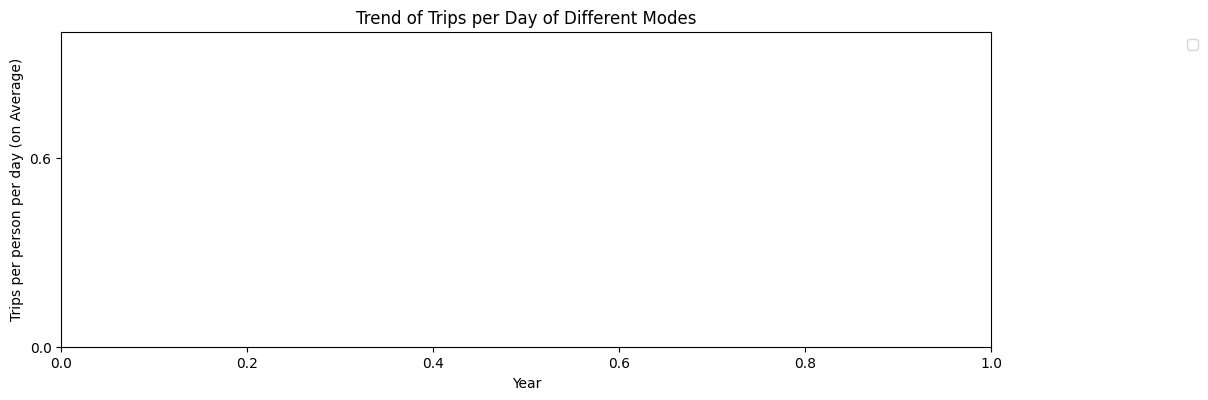

In [55]:
import matplotlib.pyplot as plt

df_1 = df_mat[df_mat['Leeftijd']=='Totaal']
df_1 = df_mat[df_mat['Reismotieven']=='Totaal']
df_1 = df_mat[df_mat['Vervoerwijzen']!='Totaal']

fig = plt.figure(figsize=(12, 9))
gs = fig.add_gridspec(nrows=2)
colors = ['blue','orange','green','red','purple','brown','black']


x = df_1['Perioden'].drop_duplicates()
y = df_1['Vervoerwijzen'].drop_duplicates()
labels = ['Car(driver)','Car(passenger)','Train','Bus/Tram/Metro','Bike','Walk','Other Modes']
ax = fig.add_subplot(gs[0])
j=0
for i in y:
    ax.plot(x,df_1[df_1['Vervoerwijzen']==i]['Ritten per persoon per dag (gemiddeld) (aantal)'],color = colors[j],marker = '.')
    j+=1
ax.set_xlabel('Year')
ax.set_ylabel('Trips per person per day (on Average)')
ax.set_xticks(ax.get_xticks()[::1])
ax.set_yticks(ax.get_yticks()[::3])
ax.set_title('Trend of Trips per Day of Different Modes')
ax.legend(labels,loc='upper right',bbox_to_anchor=(1.23, 1))

plt.show()


In [77]:
px.line(df_mat,
        x="Perioden",
        y="Ritten per persoon per dag (gemiddeld) (aantal)",
        line_group="Reismotieven",
        color="Reismotieven")
